In [530]:
import pandas as pd

In [531]:
hds = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [532]:
hds.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [533]:
hds_dup = hds.duplicated().any()

In [534]:
hds= hds.drop_duplicates()

In [535]:
hds_dup = hds.duplicated().any()

In [536]:
#####Separating the categorical and numerical columns
cat_data = []
num_data = []
cols = hds.columns
for j in cols:
    if hds[j].nunique() <=10:
        cat_data.append(j)
    else:
        num_data.append(j)
        
           

In [537]:
####Encoding to the binary vector form 
cat_data

['sex',
 'chest pain type',
 'fasting blood sugar',
 'resting ecg',
 'exercise angina',
 'ST slope',
 'target']

In [538]:
num_data

['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

In [539]:
hds['chest pain type'].unique()

array([2, 3, 4, 1], dtype=int64)

In [540]:
cat_data.remove('target')



In [541]:
cat_data.remove('sex')

In [542]:
hds = pd.get_dummies(hds,columns=cat_data, drop_first=True)

In [543]:
cat_data

['chest pain type',
 'fasting blood sugar',
 'resting ecg',
 'exercise angina',
 'ST slope']

In [544]:
hds.head()

,age,sex,resting bp s,cholesterol,max heart rate,oldpeak,target,chest pain type_2,chest pain type_3,chest pain type_4,fasting blood sugar_1,resting ecg_1,resting ecg_2,exercise angina_1,ST slope_1,ST slope_2,ST slope_3
0,40,1,140,289,172,0.0,0,1,0,0,0,0,0,0,1,0,0
1,49,0,160,180,156,1.0,1,0,1,0,0,0,0,0,0,1,0
2,37,1,130,283,98,0.0,0,1,0,0,0,1,0,0,1,0,0
3,48,0,138,214,108,1.5,1,0,0,1,0,0,0,1,0,1,0
4,54,1,150,195,122,0.0,0,0,1,0,0,0,0,0,1,0,0


In [545]:
####Feature Scaling
from sklearn.preprocessing import StandardScaler

In [546]:
SS = StandardScaler()##instance of standardscaler

In [547]:
hds[num_data] = SS.fit_transform(hds[num_data])###do the fit and transformation of the numerical columns
####after they are scaled the values will be in the range of -4 to 4, -3 to 3, -2 to 2 or -1 to 1 which totally depends on the dataset.

In [548]:
hds.head()

,age,sex,resting bp s,cholesterol,max heart rate,oldpeak,target,chest pain type_2,chest pain type_3,chest pain type_4,fasting blood sugar_1,resting ecg_1,resting ecg_2,exercise angina_1,ST slope_1,ST slope_2,ST slope_3
0,-1.433140,1,0.410909,0.825070,1.382928,-0.832432,0,1,0,0,0,0,0,0,1,0,0
1,-0.478484,0,1.491752,-0.171961,0.754157,0.105664,1,0,1,0,0,0,0,0,0,1,0
2,-1.751359,1,-0.129513,0.770188,-1.525138,-0.832432,0,1,0,0,0,1,0,0,1,0,0
3,-0.584556,0,0.302825,0.139040,-1.132156,0.574711,1,0,0,1,0,0,0,1,0,1,0
4,0.051881,1,0.951331,-0.034755,-0.581981,-0.832432,0,0,1,0,0,0,0,0,1,0,0


In [549]:
X = hds.drop('target',axis=1)


In [550]:
X

,age,sex,resting bp s,cholesterol,max heart rate,oldpeak,chest pain type_2,chest pain type_3,chest pain type_4,fasting blood sugar_1,resting ecg_1,resting ecg_2,exercise angina_1,ST slope_1,ST slope_2,ST slope_3
0,-1.433140,1,0.410909,0.825070,1.382928,-0.832432,1,0,0,0,0,0,0,1,0,0
1,-0.478484,0,1.491752,-0.171961,0.754157,0.105664,0,1,0,0,0,0,0,0,1,0
2,-1.751359,1,-0.129513,0.770188,-1.525138,-0.832432,1,0,0,0,1,0,0,1,0,0
3,-0.584556,0,0.302825,0.139040,-1.132156,0.574711,0,0,1,0,0,0,1,0,1,0
4,0.051881,1,0.951331,-0.034755,-0.581981,-0.832432,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,-0.902775,1,-1.210356,0.596393,-0.188999,0.293283,0,0,0,0,0,0,0,0,1,0
1186,1.536902,1,0.627078,-0.053049,0.164684,2.357094,0,0,1,1,0,0,0,0,1,0
1187,0.370100,1,-0.129513,-0.620168,-0.857069,0.293283,0,0,1,0,0,0,1,0,1,0
1188,0.370100,0,-0.129513,0.340275,1.461525,-0.832432,1,0,0,0,0,1,0,0,1,0


In [551]:
y = hds['target']


In [552]:
y

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 918, dtype: int64

In [553]:
from sklearn.model_selection import train_test_split


In [554]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=38)

In [555]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(734, 16) (184, 16) (734,) (184,)


In [556]:
X_test


,age,sex,resting bp s,cholesterol,max heart rate,oldpeak,chest pain type_2,chest pain type_3,chest pain type_4,fasting blood sugar_1,resting ecg_1,resting ecg_2,exercise angina_1,ST slope_1,ST slope_2,ST slope_3
274,0.157954,1,-0.669935,0.193922,-0.110403,-0.832432,0,1,0,0,0,1,0,1,0,0
681,1.006537,1,0.681120,0.312834,0.518368,1.325188,0,0,0,1,0,1,0,0,0,1
350,-1.857431,1,-1.210356,-1.818435,-0.464087,0.105664,0,0,1,1,0,0,1,0,1,0
792,0.900464,0,0.302825,0.870806,-1.210752,0.949950,0,0,1,1,0,0,0,0,1,0
348,-0.584556,1,-0.940145,-1.818435,-0.346192,-0.832432,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,-0.372411,1,0.032614,0.175628,-0.346192,0.199473,0,0,1,0,0,0,1,0,1,0
571,0.264027,1,-0.237597,0.221363,-0.699876,1.043759,0,0,1,0,1,0,1,0,0,1
836,-1.008848,1,-0.669935,0.193922,1.304332,-0.832432,1,0,0,0,0,0,0,1,0,0
781,-1.114921,1,-1.210356,0.111598,0.950648,-0.832432,0,0,1,0,0,0,0,1,0,0


In [557]:
y_test

274    0
681    0
350    1
792    1
348    1
      ..
531    1
571    1
836    0
781    0
328    1
Name: target, Length: 184, dtype: int64

In [558]:
X_train

,age,sex,resting bp s,cholesterol,max heart rate,oldpeak,chest pain type_2,chest pain type_3,chest pain type_4,fasting blood sugar_1,resting ecg_1,resting ecg_2,exercise angina_1,ST slope_1,ST slope_2,ST slope_3
316,2.173339,1,0.681120,-1.818435,-0.542683,0.387092,1,0,0,1,1,0,0,1,0,0
598,0.157954,1,0.032614,-0.126226,-0.031807,-0.644813,0,1,0,0,1,0,0,1,0,0
277,-0.266338,1,0.140698,-0.354903,0.518368,1.043759,0,1,0,0,0,0,0,0,1,0
35,-2.281723,1,-0.399724,0.504923,0.714859,-0.832432,1,0,0,0,0,0,0,1,0,0
268,-2.069577,1,-1.858862,0.193922,0.518368,-0.832432,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.370100,1,-1.480567,-1.818435,0.439772,-0.551004,0,1,0,1,0,0,0,0,1,0
468,1.006537,0,-0.021428,-1.818435,-0.267596,-0.738623,1,0,0,0,0,0,0,1,0,0
53,-1.327067,0,-0.129513,0.422599,0.518368,-0.832432,1,0,0,0,0,0,0,1,0,0
845,0.476173,0,0.951331,0.770188,0.989946,0.105664,0,0,0,1,0,1,0,1,0,0


In [559]:
y_train

316    1
598    0
277    1
35     0
268    0
      ..
317    1
468    0
53     0
845    0
418    0
Name: target, Length: 734, dtype: int64

In [560]:
    ##logistic regression
from sklearn.linear_model import LogisticRegression


In [561]:
clf0 = LogisticRegression()
clf0.fit(X_train,y_train)####test models accuracy on the training data set

LogisticRegression()

In [562]:
yhat = clf0.predict(X_test)


In [563]:
from sklearn.metrics import accuracy_score


In [564]:
accuracy_score(y_test,yhat)


0.8586956521739131

In [565]:
AS_LR = accuracy_score(y_test,yhat)

In [566]:
###SVC
from sklearn import svm

In [567]:
clf1 = svm.SVC()


In [568]:
clf1.fit(X_train,y_train)


SVC()

In [569]:
yhat1 = clf1.predict(X_test)


In [570]:
accuracy_score(y_test,yhat1)


0.8369565217391305

In [571]:
AS_SVN = accuracy_score(y_test,yhat1)


In [572]:
##Decision tree
from sklearn.tree import DecisionTreeClassifier


In [573]:
clf2 = DecisionTreeClassifier()


In [574]:
clf2.fit(X_train,y_train)


DecisionTreeClassifier()

In [575]:
yhat2= clf2.predict(X_test)


In [576]:
accuracy_score(y_test,yhat2)


0.7934782608695652

In [577]:
AS_DT = accuracy_score(y_test,yhat2)


In [578]:
####random forest
from sklearn.ensemble import RandomForestClassifier


In [579]:
clf3 = RandomForestClassifier()


In [580]:
clf3.fit(X_train,y_train)


RandomForestClassifier()

In [581]:
yhat3= clf3.predict(X_test)


In [582]:
accuracy_score(y_test,yhat3)


0.8532608695652174

In [583]:
AS_RF = accuracy_score(y_test,yhat3)


In [584]:
###Kneighbour classifier
from sklearn.neighbors import KNeighborsClassifier

In [585]:
clf4 = KNeighborsClassifier()

In [586]:
clf4.fit(X_train,y_train)


KNeighborsClassifier()

In [587]:
yhat4=clf4.predict(X_test)


In [588]:
accuracy_score(y_test,yhat4)


0.8586956521739131

In [589]:
AS_KNN = accuracy_score(y_test,yhat4)

In [590]:
####https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/
#####https://stackoverflow.com/questions/14860460/append-several-variables-to-a-list-in-python

name = ['LF','SVN', 'DT', 'RF', 'KNN']
acc = []
acc.append(AS_LR)
acc.append(AS_SVN)
acc.append(AS_DT)
acc.append(AS_RF)
acc.append(AS_KNN)

dict = {'models': name, 'accuracies': acc} 
    
df = pd.DataFrame(dict)
    
df 

,models,accuracies
0,LF,0.858696
1,SVN,0.836957
2,DT,0.793478
3,RF,0.853261
4,KNN,0.858696


In [591]:

###Visualisation
from matplotlib import pyplot as plt
import numpy as np

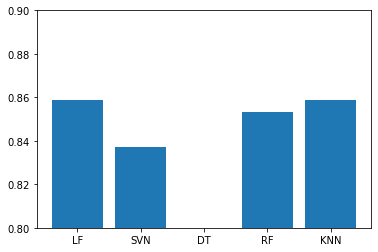

In [592]:
####https://pythonguides.com/matplotlib-set-y-axis-range/
plt.bar(name, acc)

plt.setp(plt.gca(), ylim=(0.80, 0.90))

plt.show()

In [593]:
hds.head()##there are 16 variables(columns)

,age,sex,resting bp s,cholesterol,max heart rate,oldpeak,target,chest pain type_2,chest pain type_3,chest pain type_4,fasting blood sugar_1,resting ecg_1,resting ecg_2,exercise angina_1,ST slope_1,ST slope_2,ST slope_3
0,-1.433140,1,0.410909,0.825070,1.382928,-0.832432,0,1,0,0,0,0,0,0,1,0,0
1,-0.478484,0,1.491752,-0.171961,0.754157,0.105664,1,0,1,0,0,0,0,0,0,1,0
2,-1.751359,1,-0.129513,0.770188,-1.525138,-0.832432,0,1,0,0,0,1,0,0,1,0,0
3,-0.584556,0,0.302825,0.139040,-1.132156,0.574711,1,0,0,1,0,0,0,1,0,1,0
4,0.051881,1,0.951331,-0.034755,-0.581981,-0.832432,0,0,1,0,0,0,0,0,1,0,0


In [594]:
###https://www.youtube.com/watch?v=c4mS7KaOIGY
###divide the data set into X and y:
y=hds['target']###has dependednt varaible

####rest of the variables are loaded in the X variable
###the target variable(independent variable) is loaded into the target variable

X=hds.drop('target',axis=1)


In [595]:
X.shape

(918, 16)

In [596]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 1189
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    918 non-null    float64
 1   sex                    918 non-null    int64  
 2   resting bp s           918 non-null    float64
 3   cholesterol            918 non-null    float64
 4   max heart rate         918 non-null    float64
 5   oldpeak                918 non-null    float64
 6   chest pain type_2      918 non-null    uint8  
 7   chest pain type_3      918 non-null    uint8  
 8   chest pain type_4      918 non-null    uint8  
 9   fasting blood sugar_1  918 non-null    uint8  
 10  resting ecg_1          918 non-null    uint8  
 11  resting ecg_2          918 non-null    uint8  
 12  exercise angina_1      918 non-null    uint8  
 13  ST slope_1             918 non-null    uint8  
 14  ST slope_2             918 non-null    uint8  
 15  ST sl

In [597]:
from sklearn.neighbors import KNeighborsClassifier

In [598]:
Knn_clf = KNeighborsClassifier()
Knn_clf.fit(X,y)

KNeighborsClassifier()

In [599]:
###Prediction by the model in the below given data
import pandas as pd


In [600]:
recent = pd.DataFrame({
    'age':52,
    'sex':1,
    'chest pain type_2':0,
    'chest pain type_3':1,
    'chest pain type_4':0,
    'resting bp s':125,
    'cholesterol':212,
    'fasting blood sugar_1':0,
    'resting ecg_1':1,
    'resting ecg_2':1,
    'max heart rate':157,
    'exercise angina_1 ':0,
    'oldpeak':1.0,
     'ST slope_1':1,
    'ST slope_2':0,
    'ST slope_3':1,
  },index=[0])

In [601]:
recent

,age,sex,chest pain type_2,chest pain type_3,chest pain type_4,resting bp s,cholesterol,fasting blood sugar_1,resting ecg_1,resting ecg_2,max heart rate,exercise angina_1,oldpeak,ST slope_1,ST slope_2,ST slope_3
0,52,1,0,1,0,125,212,0,1,1,157,0,1.0,1,0,1


In [602]:
t = Knn_clf.predict(recent)
t

array([1], dtype=int64)

In [603]:
t = Knn_clf.predict(recent)
if t[0]==0:
    print("THERE IS NO HEART ILLNESS.")
else:
    print("THERE IS HEART ILLNESS.")

THERE IS HEART ILLNESS.


In [604]:
#####hyperparameter tuning#####

In [605]:
from sklearn.model_selection import train_test_split


In [606]:
###https://www.youtube.com/watch?v=c4mS7KaOIGY
###divide the data set into X and y:
y=hds['target']###has dependednt varaible

####rest of the variables are loaded in the X variable
###the target variable(independent variable) is loaded into the target variable

X=hds.drop('target',axis=1)


In [607]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 100)

In [608]:
####testing the accuracy of the data on test data

In [609]:
from sklearn.neighbors import KNeighborsClassifier

In [610]:
#####https://www.youtube.com/watch?v=L3PC3FkqGUA
####https://www.youtube.com/watch?v=c4mS7KaOIGY
####https://scikit-learn.org/stable/modules/model_evaluation.html
clf4.score(X_test, y_test)

0.9021739130434783

In [611]:
###https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.model_selection import GridSearchCV


In [612]:
import numpy as np

In [613]:
####https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
####default n_neighbors is 5
####udemy ko pani herne
grids = {'n_neighbors' : np.arange(1,25)}

In [614]:
grids

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24])}

In [615]:
Clf4_grids = KNeighborsClassifier()

In [616]:
Clf4_search_parameter = GridSearchCV(Clf4_grids, grids, cv = 10)

In [617]:
Clf4_search_parameter

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [618]:
Clf4_search_parameter.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [619]:
Clf4_search_parameter.best_score_

0.8706034801925213

In [620]:
Clf4_search_parameter.best_params_

{'n_neighbors': 9}

In [621]:
###after hyperparameter tuning
print('Train Accuracy - ', Clf4_search_parameter.score(X_train, y_train))
print('Test Accuracy - ', Clf4_search_parameter.score(X_test, y_test))

Train Accuracy -  0.885558583106267
Test Accuracy -  0.8695652173913043


In [622]:
###before hyperparameter tuning
###the default score in a classifier is accuracy.
print('Train Accuracy - ', clf4.score(X_train, y_train))
print('Test Accuracy - ', clf4.score(X_test, y_test))

Train Accuracy -  0.8937329700272479
Test Accuracy -  0.9021739130434783


In [623]:
#####Making predictions with the tuned KNN model 
y_prediction = Clf4_search_parameter.predict(X_test)
y_prediction

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [624]:
y_test
####Comparing the test datas:comparing the y_prediction and y_test the first 5 values(1,1,0,0,1)
####are all matching but from the sixth the values differ 

429    1
425    1
801    0
174    0
392    1
      ..
393    1
10     0
627    0
742    0
847    1
Name: target, Length: 184, dtype: int64

In [625]:
####Evaluating the tuned machine learning classifier
####to get the evaluation metrics beyond accuracy we use  the 
'''
Roc curve: compares TP rate to FP rate  
confusion matrix
'''

from sklearn.metrics import plot_roc_curve

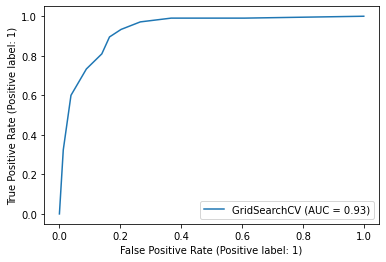

In [626]:
plot_roc_curve(Clf4_search_parameter, X_test, y_test)

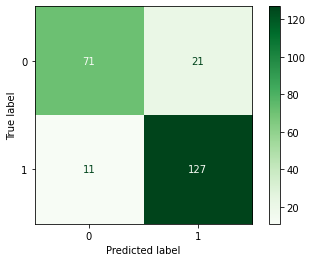

In [627]:
####confusion matrix
####https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
####https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py
####https://www.youtube.com/watch?v=QRFMgKdF-Ug
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
classifier_KNN = KNeighborsClassifier()
classifier_KNN.fit(X_train, y_train)

conf_KNN = plot_confusion_matrix(Clf4_search_parameter,X_test, y_test, cmap='Greens') 

######an already fitted model is passed Clf4_search_parameter.
######here Clf4_search_parameter.predict(X_test) is done and its gonna compare those predictions to y_test internally 
######this comparison is the basis of the confusion matrix

In [628]:
conf_KNN.confusion_matrix###this displays the confusion_matrix in normal form

array([[ 71,  21],
       [ 11, 127]], dtype=int64)

In [629]:
####cross validation
####https://www.youtube.com/watch?v=L_dQrZZjGDg
####https://scikit-learn.org/stable/modules/cross_validation.html
####https://www.youtube.com/watch?v=V0ZQbN9lRBw

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [630]:
###https://www.youtube.com/watch?v=c4mS7KaOIGY
###divide the data set into X and y:
y=hds['target']###has dependednt varaible

####rest of the variables are loaded in the X variable
###the target variable(independent variable) is loaded into the target variable

X=hds.drop('target',axis=1)


In [631]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
classifier_Knn = KNeighborsClassifier(n_neighbors= 5 )
classifier_Knn.fit(X_train, y_train)

KNeighborsClassifier()

In [632]:
#####https://www.youtube.com/watch?v=V0ZQbN9lRBw
#####https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
neigh = range(1,3)
knn_accuracy = []

for i in neigh:
    classifier_Knn = KNeighborsClassifier(n_neighbors= i )
    cv_Knn = cross_val_score(Clf4_search_parameter,X_test, y_test, cv=10, scoring = 'accuracy') 
    knn_accuracy.append(cv_Knn.mean())
    

In [633]:
knn_accuracy

[0.8391304347826087, 0.8391304347826087]

In [634]:
#####https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score
#####https://www.youtube.com/watch?v=V0ZQbN9lRBw
#####https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-3-structured-data-projects/end-to-end-heart-disease-classification-video.ipynb


neigh = range(1,3)
knn_precision = []

for i in neigh:
    classifier_Knn = KNeighborsClassifier(n_neighbors= i )
    cv_Knn = cross_val_score(Clf4_search_parameter,X_test, y_test, cv=10, scoring = 'precision') 
    knn_precision.append(cv_Knn.mean())

In [635]:
knn_precision

[0.8609111721611722, 0.8609111721611722]

In [636]:
#####https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score
#####https://www.youtube.com/watch?v=V0ZQbN9lRBw
#####https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-3-structured-data-projects/end-to-end-heart-disease-classification-video.ipynb


neigh = range(1,3)
knn_recall = []

for i in neigh:
    classifier_Knn = KNeighborsClassifier(n_neighbors= i )
    cv_Knn = cross_val_score(Clf4_search_parameter,X_test, y_test, cv=10, scoring = 'recall') 
    knn_recall.append(cv_Knn.mean())

In [637]:
knn_recall

[0.8774725274725274, 0.8774725274725274]

In [638]:
####https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
#####https://www.youtube.com/watch?v=V0ZQbN9lRBw
#####https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-3-structured-data-projects/end-to-end-heart-disease-classification-video.ipynb

neigh = range(1,3)
knn_f1 = []

for i in neigh:
    classifier_Knn = KNeighborsClassifier(n_neighbors= i )
    cv_Knn = cross_val_score(Clf4_search_parameter,X_test, y_test, cv=10, scoring = 'f1') 
    knn_f1.append(cv_Knn.mean())

In [639]:
knn_f1

[0.8665085540257953, 0.8665085540257953]